# Tarea 1 - Machine Learning

Araya Gabriel
Casanueva Rolando

## Máquinas de aprendizaje aplicadas a la medicina

#### Librerias

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import copy
from matplotlib import pyplot as plt 

Tenemos un conjunto de datos los cuales se estructuran en 7 atributos, cada uno teniendo una indexación y valor escrito de la forma descrita en el código a continuación

In [2]:
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programas\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Programas\Anaconda\lib\site-packages\ipyker

Aparecen warning ligados a versionamiento, pero podemos ignorarlos y notar que hemos obtenido los datos de la siguiente forma

In [3]:
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


Podemos ver más información

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null object
chest_pain    270 non-null object
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null object
electro       270 non-null object
max_heart     270 non-null float64
angina        270 non-null object
oldpeak       270 non-null float64
slope         270 non-null object
vessel        270 non-null float64
thal          270 non-null object
normal        270 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 29.6+ KB


In [7]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


Podemos utilizar histogramas para describir visualmente las distribuciones de cada atributo.

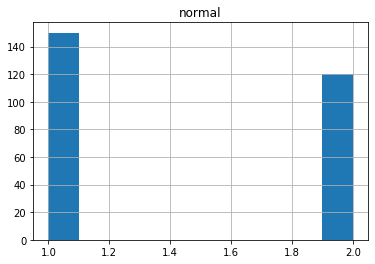

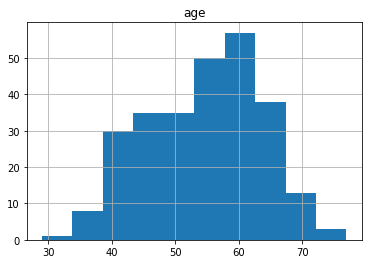

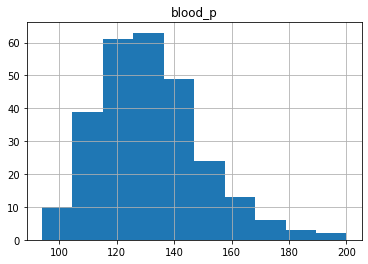

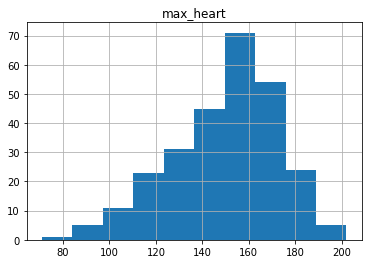

In [8]:
h0=df.hist(column="normal")
h1=df.hist(column="age")
h2=df.hist(column="blood_p")
h3=df.hist(column="max_heart")

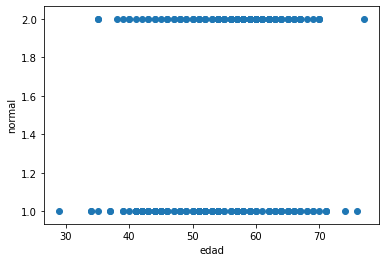

In [9]:
plt.scatter(df.age,df.normal)
plt.ylabel('normal')
plt.xlabel('edad')
plt.show()

O bien, como observamos en este último gráfico, podemos notar que se encuentra bien distribuida la edad con respecto a estar normal.

**Un poco sobre el dataset**

Se tiene un dataset 14x270 constituido por 13 atributos (más una variable dependiente a predecir) recolectados de un total de 270 pacientes. El atributo "normal" describe si tiene tiene una enfermedad cardiáca, siendo 2 para los casos positivos y 1 para los negativos. Éste es la variable dependiente Y que se busca predecir. De los gráficos se puede observar que 150 pacientes están sanos y 120 enfermos. La edad varía entre los 30 y 80 años aproximadamente, concentrándose la mayoría entre los 40 y 70 años.

### Descategorización y representación como *one hot vector*

In [12]:
df = pd.get_dummies(df)
df1= copy.deepcopy(df) #df auxiliar que se usará más adelante
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


Los atributos crecieron de 13 a 25 (sin considerar la columna "normal") debido a la descategorización de los atributos originales. Cuando se tiene una variable categórica con get_dummies se crean X variables dummies con resultados binarios (0,1) que indican la ausencia o presencia de tales variables. Esto es útil ya que se pueden representar múltiples categorías de subgrupos en una regresión lineal. Del ejemplo propuesto en el enunciado, se pueden hacer regresiones sólo para pacientes mujeres, o sólo para pacientes hombres, en vez de considerar el caso de ambos al mismo tiempo como en la variable "sex". Claramente lo anterior puede crear *overfitting* ya que habrá variables que son **linealmente dependientes** entre sí. Por ejemplo *sex_female* es la negación a *sex_male*, ya que sabiendo que alguien es mujer de inmediato se entiende que no es hombre.

### Extracción de valores a predecir

In [13]:
class_label = df.pop("normal").values -1
reg_label = df.pop("blood_p").values
df2=copy.deepcopy(df) #df auxiliar que se usará más adelante
X_data = df.values

Una vez sacados los valores de estos atributos podemos empezar por separar nuestros conjuntos de *training* y *testing* en base al $30\%$ de los datos.

In [14]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30

In [15]:
X_train = X_data[~mask_test] 
X_test = X_data[mask_test]
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


### Estandarización

La idea de realizar este paso es "normalizar" los datos centrándolos de tal forma que su promedio sea cero y su desviación estándar sea 1, de esta forma la distribución de cada dato será la misma que el valor original. Con ello se busca eliminar la idea de escalas en las medidas, ya que por ejemplo datos en kilometros o en metros afectarían de forma distinta a la regresión sólo por sus magnitudes.

In [16]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

### Regresión lineal 

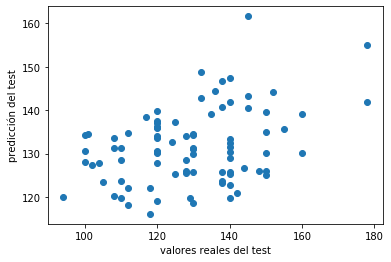

In [17]:
from sklearn.linear_model import LinearRegression as LR

model = LR(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)
residuo_train = reg_label_train - reg_pred_train
residuo_test = reg_label_test - reg_pred_test
plt.scatter(reg_label_test,reg_pred_test)
plt.ylabel('predicción del test')
plt.xlabel('valores reales del test')
plt.show()

A simple vista no pareciera que la regresión sea lineal, probablemente se encontrarán errores altos y coeficientes de correlación muy bajos.

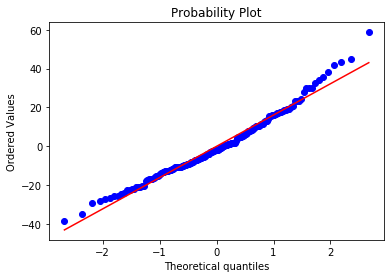

In [19]:
import pylab 
import scipy.stats as stats

stats.probplot(residuo_train, dist="norm", plot=pylab)
pylab.show()

Pero, del gráfico anterior, el residuo obtenido de la predicción de los datos de entrenamiento claramente sigue una distribución normal para la gran mayoría de los datos.

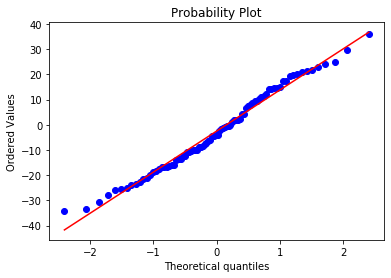

In [21]:
stats.probplot(residuo_test, dist="norm", plot=pylab)
pylab.show()

Del gráfico QQ obtenido con los residuos sobre los datos de test, también se observa una distribución normal.

Por tanto se puede concluir, que al menos, el supuesto de normalidad en el residuo sí se cumple.

### Medida de correlación

De la página 12 de la diapositiva "Selección de Atributos", se asumió que teniendo una distribución normal para el error (la cual se verificó en el punto anterior) entonces el Z-score es:

$$Z\,(i)=\frac{\hat{a_{i}}}{STD\,(\hat{a_{i}})}$$

donde los términos   $\hat{a_{i}}$   y   $STD\,(\hat{a_{i}})$ son:

$$ 
\hat{a_{i}} = \frac{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)\cdot \left(Y_{j}-\bar{Y}\right)}{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}
$$

$$
STD\,(\hat{a_{i}}) = \frac{\sigma}{\sqrt{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}}
$$

y además la desviación estandar $\sigma$ se puede estimar insesgadamente con:

$$
\hat{\sigma}^{2} = \frac{\sum\left(\hat{Y}-Y\right)^{2}}{N-d-1}
$$

donde $d=1$ para reducir 1 grado de libertad debido a que se asumió normalidad.

Reemplazando todo lo anterior en el Z-score se tiene que:
$$
Z\,(i)= \frac{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)\cdot \left(Y_{j}-\bar{Y}\right)}{\sqrt{\sum_{j} \left(X_{j}^{i}-\bar{X^{i}} \right)^{2}}} \cdot \sqrt{\frac{N-2}{\sum\left(\hat{Y}-Y\right)^{2}}}
$$


El F-score es explicado en la página 14 de la misma diapositiva y queda definido como:

$$
F\,(i) = \frac{\frac{SSR(i)}{1}}{\frac{SSE(i)}{N-2}}
$$

donde $SSR(i)$ y $SSE(i)$ se son:

$$
SSR(i) = \sum\left(\hat{Y}_{i}-\bar{Y}\right)^{2}
$$

$$
SSE(i) = \sum\left(\hat{Y}_{i}-Y\right)^{2}
$$

Reemplazando todo lo anterior en el F-score se tiene que:

$$
F\,(i) = \frac{(N-2)\cdot \sum\left(\hat{Y}_{i}-\bar{Y}\right)^{2}}{\sum\left(\hat{Y}_{i}-Y\right)^{2}}
$$

El Peso corresponderá a los coeficientes de la regresión.

El coeficiente de correlacion $R_{i}^{2}$ se puede obtener con la siguiente fórmula:

$$
R_{i}^{2} = \frac{SSR(i)}{SST} =\frac{SSR(i)}{SSR(i)+SSE(i)}
$$

De lo anterior se pueden crear las siguientes funciones:

In [22]:
def z_score(x,y,y_pred):
    a = (sum((x-np.mean(x))*(y-np.mean(y)))/(sum((x-np.mean(x))**2))**0.5)
    b = ((len(x)-2)/sum((y_pred-y)**2))**0.5
    try:
        z = a*b
    except:
        z = 0
    return z

def f_score(y,y_pred):
    ssr = sum((y_pred-np.mean(y))**2)
    sse = sum((y_pred-y)**2)
    try:
        f = (len(y)-2)*ssr/sse
    except:
        f = 0
    return f

def coef_correlacion(y,y_pred):
    ssr = sum((y_pred-np.mean(y))**2)
    sse = sum((y_pred-y)**2)
    try:
        r2 = ssr/(ssr+sse)
    except:
        r2 = 0
    return r2

A continuación se aplicarán las funciones para realizar la tabla pedida, destacando el hecho de que la regresión lineal se hizo para la totalidad de los datos (no se separó en entrenamiento y test) tanto por simplicidad como para realizar una comparación definitiva de ambos scores:

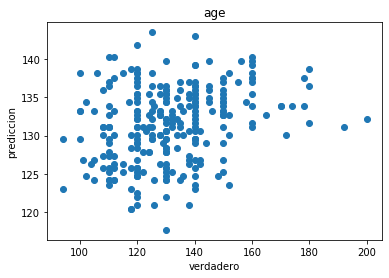

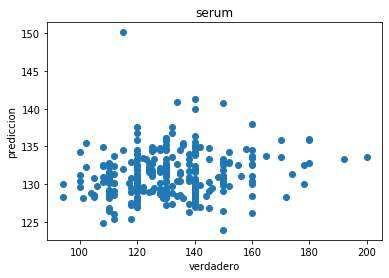

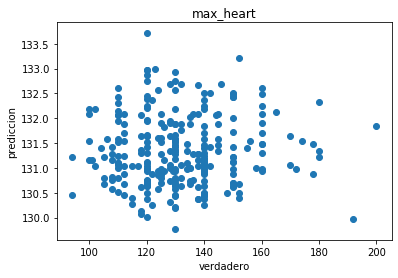

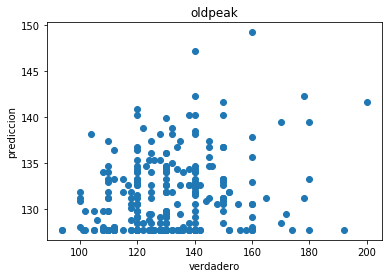

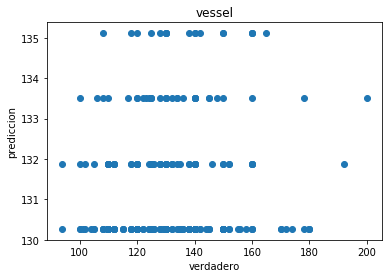

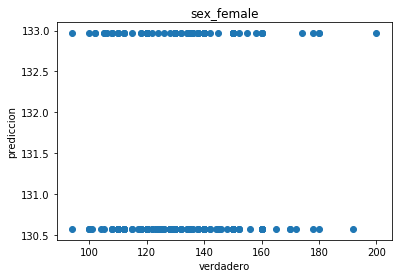

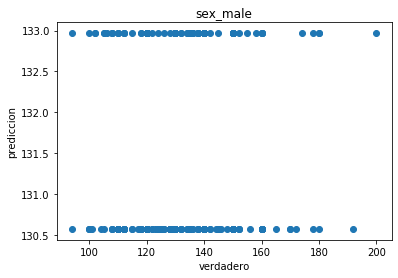

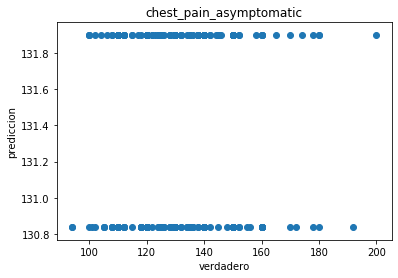

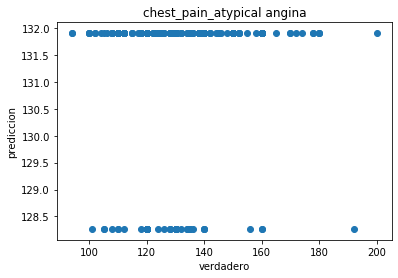

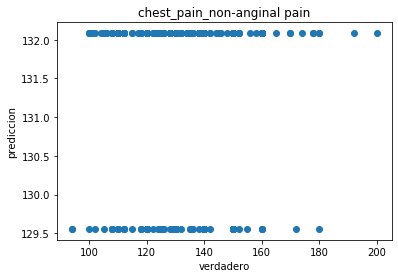

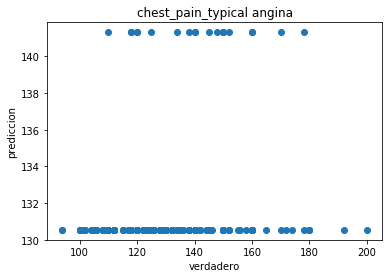

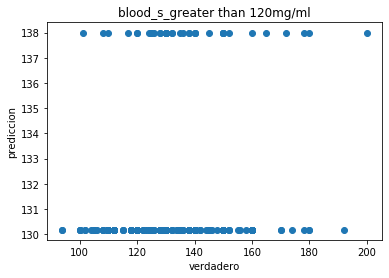

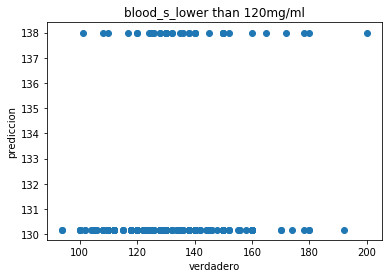

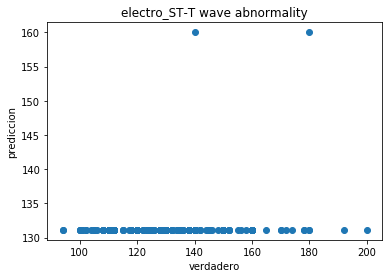

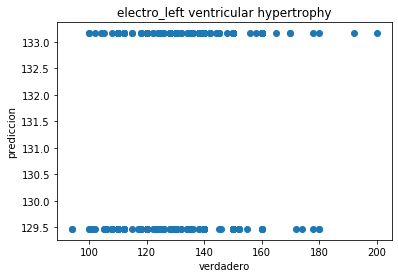

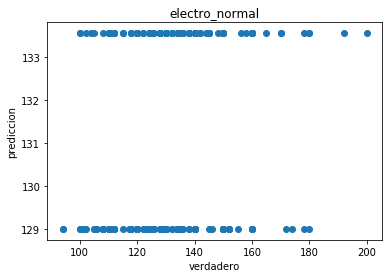

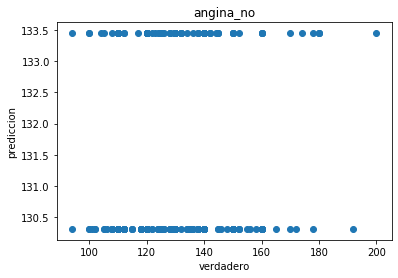

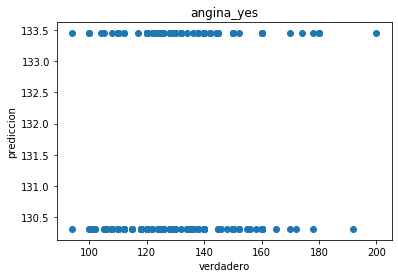

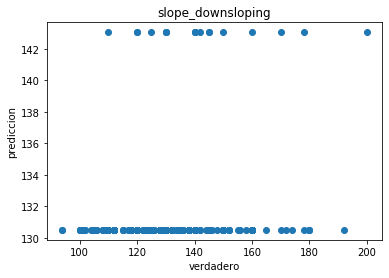

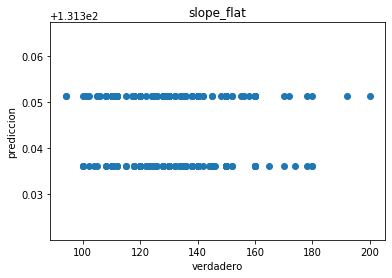

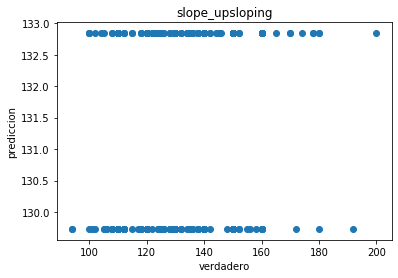

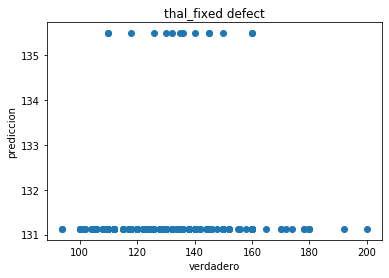

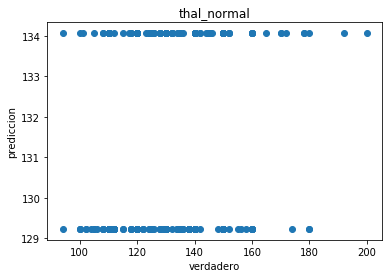

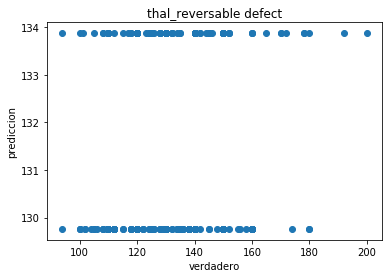

In [23]:
tabla = {'atributo' :[], 'Z-Score':[], 'F-Score':[], 'Peso':[], 'R^2':[]}
X_tabla = copy.deepcopy(df2)
y_tabla = copy.deepcopy(reg_label)
y_tabla.shape = (y_tabla.shape[0],1) #reshape de fila a columna
atributos = list (X_tabla)
for atributo in atributos:
    tabla['atributo'].append(atributo)
    valores = np.array(X_tabla[atributo])
    valores.shape = (valores.shape[0],1) #reshape de fila a columna
    std.fit(valores)
    valores_std = std.transform(valores)
    model.fit(valores_std,y_tabla)
    y_tabla_pred = model.predict(valores_std)
    tabla['Z-Score'].append(z_score(valores_std,y_tabla,y_tabla_pred)[0])
    tabla['F-Score'].append(f_score(y_tabla,y_tabla_pred)[0])
    tabla['Peso'].append(model.coef_[0][0])
    tabla['R^2'].append(coef_correlacion(y_tabla,y_tabla_pred)[0])
    plt.scatter(y_tabla,y_tabla_pred)
    plt.title(f'{atributo}')
    plt.ylabel('prediccion')
    plt.xlabel('verdadero')
    plt.show()

In [24]:
scores = pd.DataFrame.from_dict(tabla)
scores

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,7.455783e-02
1,serum,2.875818,8.270328,3.084672,2.993564e-02
2,max_heart,-0.641169,0.411098,-0.697730,1.531600e-03
3,oldpeak,3.741434,13.998330,3.972187,4.963976e-02
4,vessel,1.408107,1.982766,1.527856,7.344047e-03
5,sex_female,1.028358,1.057520,1.117729,3.930462e-03
6,sex_male,-1.028358,1.057520,-1.117729,3.930462e-03
7,chest_pain_asymptomatic,0.487474,0.237631,0.530648,8.858968e-04
8,chest_pain_atypical angina,-1.218197,1.484004,-1.323018,5.506836e-03
9,chest_pain_non-anginal pain,-1.057781,1.118901,-1.149579,4.157647e-03


In [25]:
scores.sort_values(by='Z-Score',ascending=False).head()

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,0.074558
3,oldpeak,3.741434,13.998330,3.972187,0.049640
18,slope_downsloping,2.919339,8.522540,3.129926,0.030820
1,serum,2.875818,8.270328,3.084672,0.029936
10,chest_pain_typical angina,2.618476,6.856417,2.815856,0.024945


In [26]:
scores.sort_values(by='F-Score',ascending=False).head()

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,0.074558
3,oldpeak,3.741434,13.998330,3.972187,0.049640
18,slope_downsloping,2.919339,8.522540,3.129926,0.030820
1,serum,2.875818,8.270328,3.084672,0.029936
10,chest_pain_typical angina,2.618476,6.856417,2.815856,0.024945


In [27]:
scores.sort_values(by='Peso',ascending=False).head()

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,0.074558
3,oldpeak,3.741434,13.998330,3.972187,0.049640
18,slope_downsloping,2.919339,8.522540,3.129926,0.030820
1,serum,2.875818,8.270328,3.084672,0.029936
10,chest_pain_typical angina,2.618476,6.856417,2.815856,0.024945


In [28]:
scores.sort_values(by='R^2',ascending=False).head()

,atributo,Z-Score,F-Score,Peso,R^2
0,age,4.646644,21.591299,4.868122,0.074558
3,oldpeak,3.741434,13.998330,3.972187,0.049640
18,slope_downsloping,2.919339,8.522540,3.129926,0.030820
1,serum,2.875818,8.270328,3.084672,0.029936
10,chest_pain_typical angina,2.618476,6.856417,2.815856,0.024945


En general Z-Score, F-Score, Peso y el coeficiente de correlación muestran una misma prioridad a la hora de escoger los atributos más importantes, pero claramente la regresión no es lineal ya que los coeficientes de correlación son muy bajos y ello se puede observar en los gráficos generados anteriormente.

### Error absoluto medio

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))
print("MAE train: ", mean_absolute_error(reg_label_train, reg_pred_train))
print("MAE test: ", mean_absolute_error(reg_label_test, reg_pred_test))

MSE train:  259.6292987777701
MSE test:  263.1851888628686
MAE train:  12.520139292308562
MAE test:  13.66061335199971


El error absoluto medio (MAE) para ambos casos fue aproximadamente 13, el cual no pareciera ser grave. Pero se sabe que la regresión lineal no fue correcta para este caso.
EL error cuadrático medio (MSE) castiga con más severidad y muestra de mejor manera que con un aproximado de 260 para ambos casos (entrenamiento y test) la predicción mediante una regresión lineal no funciona.

### K-Fold

In [30]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
mse_loo = 0
for train, val in loo.split(Xstd_train):
    linreg = LR(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_loo += mse_fold
    #print("%s %s" % (train, val))
print(f"MSE con K=1: {mse_loo}")

MSE con K=1: 62054.22056023351


In [31]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mse_cv = 0
for train, val in kf.split(Xstd_train):
    linreg = LR(fit_intercept=True)
    linreg.fit(Xstd_train[train], reg_label_train[train])
    yhat_kfold_val = linreg.predict(Xstd_train[val])
    mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
    mse_cv += mse_fold
    #print("%s %s" % (train, val))
mse_cv = mse_cv / 5
print(f"MSE con K=5: {mse_cv}")

MSE con K=5: 362.1008805407526


Ambos errores son muy altos, en especial para K=1. Esto sólo indica la existencia de overfitting en el modelo lineal.

### Regularización

Por los pasos realizados en la creación de columnas dummy. Trabajaremos con una norma $l_2$ equivalente a un laplaciano o suavizamiento y la norma $l_1$ equivalente a una norma euclidiana. Se espera notar una minimización de los impactos que tengan los vectores en el *Rigde* versus que unos cambios más abruptos en el *Lasso*.

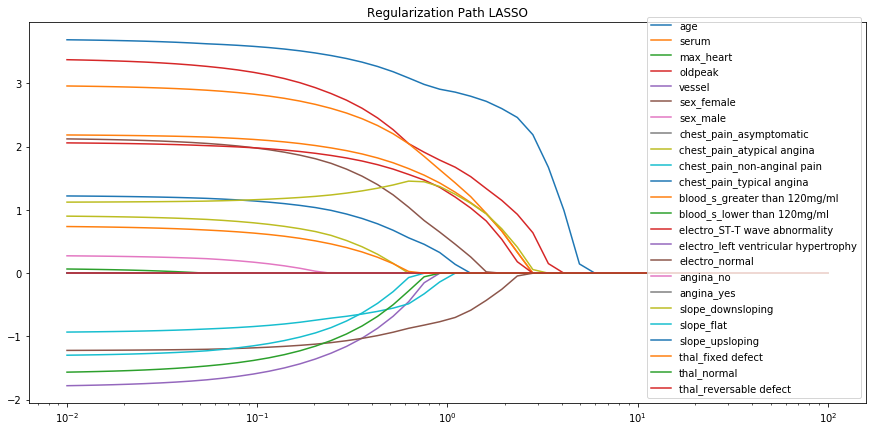

In [33]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

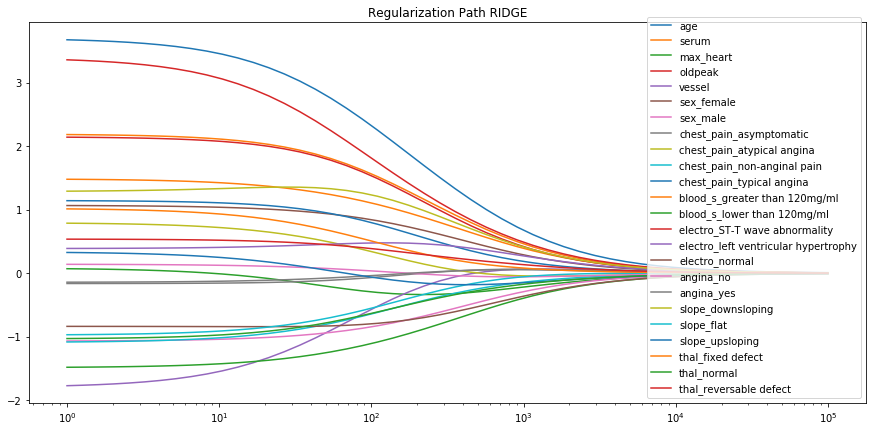

In [34]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')

plt.show()

Con el método **Lasso** aquellos atributos que no superan cierto umbral son obligados a anularse. Ello permite escoger como atributos de interés, para un $alpha$ óptimo, aquellos que no sean cero.
Lo anterior permite apreciar de mejor manera en el gráfico cuales son los atributos que más resistencia ofrecen a convertirse en cero. Para este caso los evidentes son "age", "oldpeak" y "serum".

En el método de **Ridge** según el valor del $alpha$ todos los atributos  comienzan a acercarse a cero, algunos más rápido que otros. Como cabe esperarse, para valores muy altos de $alpha$ todos los atributos convergen a cero. 
A simple vista, entre los atributos que más se resisten a anularse están "age" y "oldpeak".

In [35]:
from ipywidgets import interactive
def train_model(param):
    model = Ridge(fit_intercept=True, solver='svd')
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -15 #define your range
p_max = 15 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=15, min=-15), Output()), _dom_classes=('widg…

El parametro a escoger para Ridge es un $alpha = 10$ ya que es el que entrega un menor error cuadrático medio en el test.

In [36]:
from ipywidgets import interactive
def train_model(param):
    model = Lasso(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -15 #define your range
p_max = 15 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=15, min=-15), Output()), _dom_classes=('widg…

El parametro a escoger para Lasso es un $alpha = 0.1$ ya que es el que entrega un menor error cuadrático medio en el test.

Para ambos casos los errores son bastante altos así que se sigue sospechando que estos métodos no tienen una regresión lineal para las predicciones con respecto a esta data.

### Forward Step-wise Selection

In [37]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    remaining = list(remaining)
    selected = []
    lista_nombres = []
    lista_scores = []
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        error_inicial = 100000
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            error_candidate = mean_absolute_error(y, predictions_train)
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        lista_nombres.append(names_x[best_candidate])
        lista_scores.append(best_new_score)
        #print ("selected = %s ..."%names_x[best_candidate])
        #print ("totalvars=%d, mae = %f"%(len(indexes),best_new_score))
    return selected, lista_scores, lista_nombres
features_fss_train, scores_fss_train, nombres_fss_train = fss(Xstd_train, reg_label_train, list(df))
features_fss_test, scores_fss_test, nombres_fss_test = fss(Xstd_test, reg_label_test, list(df))
need_feat_train = features_fss_train[:5]
need_scores_train = scores_fss_train[:5]
need_nombres_train = nombres_fss_train[:5]
need_feat_test = features_fss_train[:5]
need_scores_test = scores_fss_test[:5]
need_nombres_test = nombres_fss_test[:5]
print(need_nombres_train)
print(need_nombres_test)

['age', 'oldpeak', 'sex_female', 'slope_flat', 'electro_normal']
['chest_pain_typical angina', 'angina_no', 'max_heart', 'age', 'thal_normal']


Para los casos de entrenamiento los 5 atributos escogidos son: "age", "oldpeak", "sex_female", "slope_flat" y "electro_normal".
En cambio para los casos de prueba los 5 atributos son: 'chest_pain_typical angina', 'angina_no', 'max_heart', 'age', 'thal_normal'.

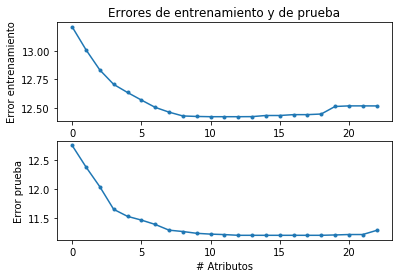

In [38]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(scores_fss_train, '.-')
plt.title('Errores de entrenamiento y de prueba')
plt.ylabel('Error entrenamiento')

plt.subplot(2, 1, 2)
plt.plot(scores_fss_test, '.-')
plt.xlabel('# Atributos')
plt.ylabel('Error prueba')

plt.show()

**Entrenamiento una sola vez**

(...)

### Atributos falsos

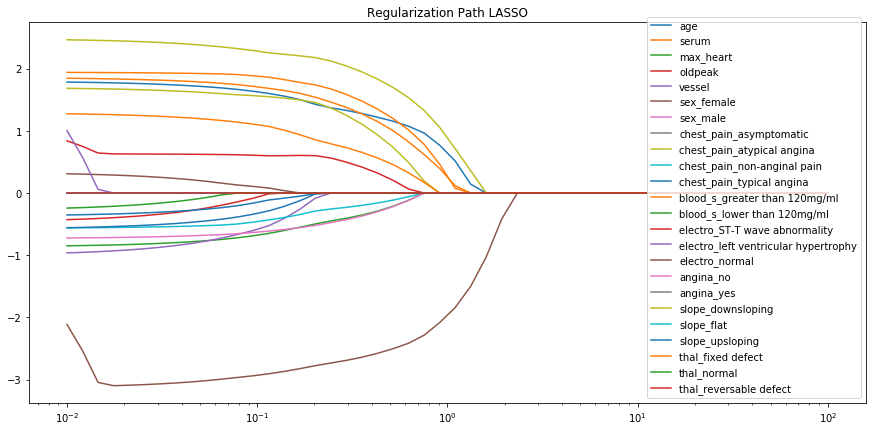

In [39]:
import random
N=184 #filas Xstd_train
D = random.randint(10, 100) #dejar fijo a 60 para probar la variación de stf
mu = random.uniform(-30, 30) #dejar fijo a 30 para probar la variación de std
std = random.uniform(5, 100)
F = np.random.normal(mu, std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
    
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path LASSO')
plt.legend(loc='lower right')
plt.show()

Se utilizó el método de Lasso ya que visualmente se aprecia de inmediato en el gráfico si hay cambios o no, dependiendo de los atributos que se anulen últimos.   

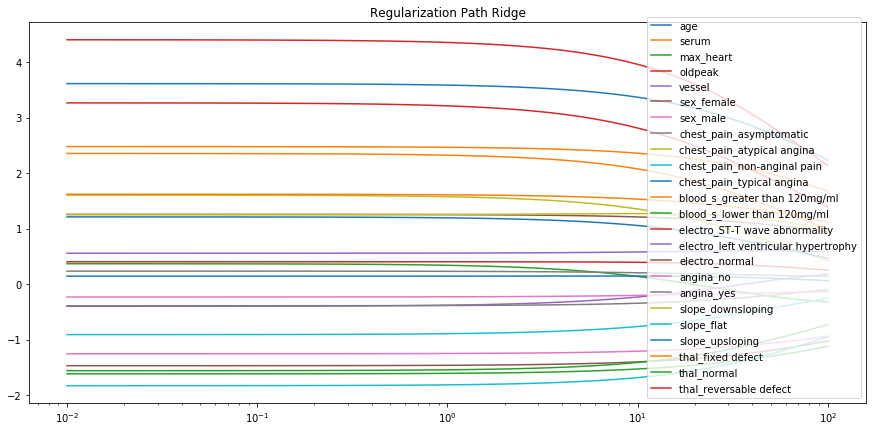

In [43]:
import random
N=184 #filas Xstd_train
D = 60 #random.randint(10, 100) #dejar fijo a 60 para probar la variación de stf
mu = 30 #random.uniform(-30, 30) #dejar fijo a 30 para probar la variación de std
std = 15#random.uniform(5, 100)
F = np.random.normal(mu, std, size=(N,D) ) #fake features
X_new_train= np.concatenate([Xstd_train, F], axis=-1)

from sklearn.linear_model import Ridge
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
    
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_new_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Ridge')
plt.legend(loc='lower right')
plt.show()

En general se siguen escogiendo los mismos atributos lo cual demuestra que el método no se cae independiente de los datos falsos, siempre y cuando el valor esperado mu no sea exageradamente alto o bajo (considerando números negativos). A la vez se probó dejando fijo D y loc para hacer variar la desviación estandar, y en general ocurren varios cambios a medida que la desviación se vuelve más grande que mu.

**p)** Entrene un modelo de regresión lineal, el mejor explorado en la experimentación previa, para predecir la presión sanguínea de los pacientes sanos, así obtener un modelo que estima cuál debiera ser el nivel sanguíneo en base al resto de información del paciente.

In [45]:
from sklearn.linear_model import Lasso
mask_norm = class_label_train == 0 
model = Lasso(fit_intercept=True)
model.fit(Xstd_train[mask_norm], reg_label_train[mask_norm])
blood_p_tr = model.predict(Xstd_train) 
blood_p_te = model.predict(Xstd_test) 

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(blood_p_tr, reg_pred_train))
print("MSE test: ", mean_squared_error(blood_p_te, reg_pred_test))
print("MAE train: ", mean_absolute_error(blood_p_tr, reg_pred_train))
print("MAE test: ", mean_absolute_error(blood_p_te, reg_pred_test))

MSE train:  54.495259077951275
MSE test:  46.835258883200716
MAE train:  5.35105455546731
MAE test:  5.211997391765174


A diferencia de la Regresión Lineal realizada en el apartado f), la regresión usando Lasso arrojó errores muy menores en comparación tanto para error cuadrático medio (MSE = 260 aprox. anteriormente) como error absoluto medio (MAE = 13 aprox. anteriormente).

**q)** Realice una clasificación de los pacientes a través de definir un umbral de decisión óptimo sobre la presión sanguínea estimada por el modelo. Por ejemplo, una cantidad mayor a $p$ es considerado como anormal (enfermo). Para ésto utilice la distribución predicha de este atributo para poder separar correctamente entre los dos tipos de comportamiento, normal (sano) y anormal (enfermo).

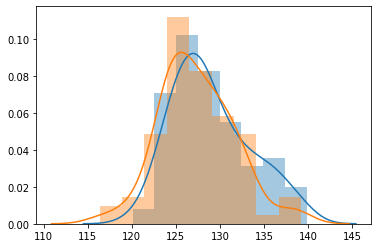

In [47]:
import seaborn as sns
sns.distplot(blood_p_tr[mask_norm], label="normal behavior")
sns.distplot(blood_p_tr[~mask_norm], label="ill person behavior")
plt.show()

Observando ese gráfico, donde la distribución azul representa los pacientes sanos y la otra distribución los enfermos, se determinó aproximadamente que bajo 128 es uno de los umbrales para que una persona esté enferma. El otro umbral se dejó como sobre 145 ya que en el gráfico no se aprecia que haya empíricamente algún umbral del tipo "blood_p mayor que..." para que una persona esté enferma. 

In [48]:
def predict_umbr(data, umbral_up, umbral_low):
    preds = []
    for value in data:
        if value > umbral_up or value < umbral_low:
            preds.append(1) #presencia
        else:
            preds.append(0)
    return np.asarray(preds)
p_up=145
p_low=128
pred_train = predict_umbr(blood_p_tr, p_up, p_low)
pred_test = predict_umbr(blood_p_te, p_up, p_low)

**r)** Mida la calidad de la clasificación entregada a través de la exactitud (*accuracy*) sobre ambos conjuntos. Evalúe si es necesario variar la decisión sobre el umbral del punto anterior. *Recuerde que, al ser un problema binario, el mínimo que se espera es por sobre 50\%*

In [49]:
from sklearn.metrics import accuracy_score
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.5271739130434783
Score test:  0.5813953488372093


No se considera necesario reevaluar ya que, después de varias pruebas, los umbrales anteriores dieron los mejores scores y que son sobre el 50%.

**s)** Compare su *framework* de clasificación con un modelo lineal simple de clasificación binaria como el *perceptrón*, el cual se entrenará para aprender directamente la tarea (de manera supervisada), sin utilizar la información de presión sanguínea. Comente sobre las diferencias, ventajas y desventajas, de cada *approach*.

In [50]:
from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(Xstd_train, class_label_train)
pred_train = model.predict(Xstd_train) 
pred_test = model.predict(Xstd_test)
print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test)) 

Score train:  0.8315217391304348
Score test:  0.8023255813953488


El método del perceptrón fue mucho más preciso (cerca de un 22% más en el conjunto de prueba), pero a cambio el método debe ser más costoso por la cantidad de iteraciones utilizadas (1000 iteraciones en el peor caso).
La ventaja del framework del apartado q) es que es fácil de implementar ya que podrían verse a simple vista se ven los umbrales pedidos. La desventaja es que cuando las distribuciones son muy parecidas, como en este caso, esos umbrales son difíciles de identificar. Más aún en este caso, donde 150 de los pacientes está enfermo y el otro 120 está sano, y sus distribuciones eran similares lo que conlleva a que independiente de la elección de los umbrales, se entregue casi siempre scores del 50%. 

**t)** Para poder darle una explicación más visual a la clasificación de ambos modelos, y así entender mejor dónde podría estar el error, proyecte los datos en 2 dimensiones. Utilice la técnica de reducción de dimensionalidad **PCA** para representar los datos en las dimensiones deseadas. Comente sobre el comportamiento, puede colorear los datos dado el estado del paciente (enfermedad) y/o la predicción de alguno de los modelos (Perceptrón o con umbral).

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train = pca.fit_transform(Xstd_train)
test = pca.fit_transform(Xstd_test)
principalDf = pd.DataFrame(data = train
             , columns = ['Columna 1', 'Columna 2'])
finalDf = pd.concat([principalDf, df1[['normal']]], axis = 1)
print('Dimensión conjunto de entrenamiento: {}'.format(train.shape))
print('Dimensión conjunto de prueba: {}'.format(test.shape))

Dimensión conjunto de entrenamiento: (184, 2)
Dimensión conjunto de prueba: (86, 2)


Si bien la cantidad de filas no vario para ambos conjuntos, las columnas se redujeron a 2 como se especificó en el enunciado.
A continuación se realizarán los gráficos:

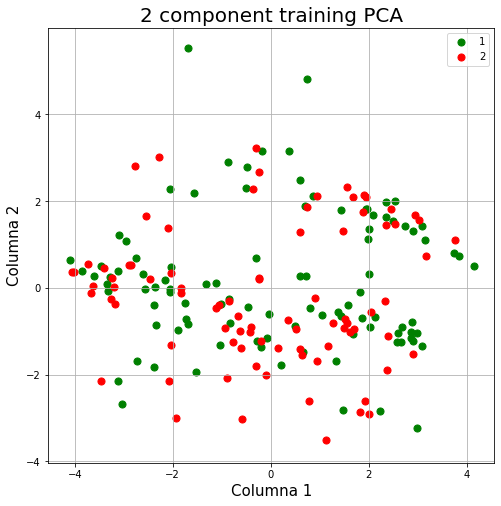

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Columna 1', fontsize = 15)
ax.set_ylabel('Columna 2', fontsize = 15)
ax.set_title('2 component training PCA', fontsize = 20)
targets = [1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['normal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Columna 1']
               , finalDf.loc[indicesToKeep, 'Columna 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

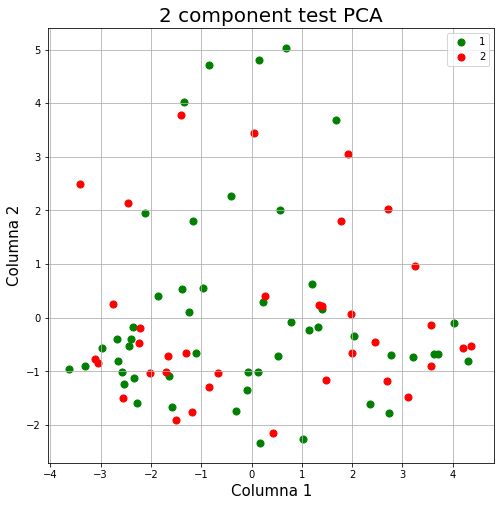

In [53]:
principalDf = pd.DataFrame(data = test
             , columns = ['Columna 1', 'Columna 2'])
finalDf = pd.concat([principalDf, df1[['normal']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Columna 1', fontsize = 15)
ax.set_ylabel('Columna 2', fontsize = 15)
ax.set_title('2 component test PCA', fontsize = 20)
targets = [1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['normal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Columna 1']
               , finalDf.loc[indicesToKeep, 'Columna 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

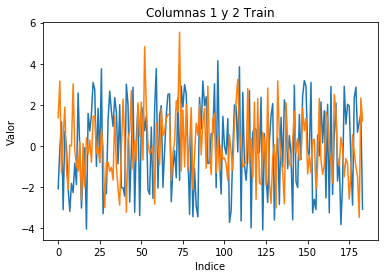

In [54]:
plt.plot(train)
plt.title('Columnas 1 y 2 Train')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

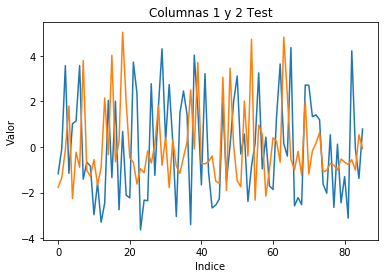

In [55]:
plt.plot(test)
plt.title('Columnas 1 y 2 Test')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

Observando los gráficos anteriores se nota a simple vista que los nuevos parametros generados con PCA no están lo suficientemente relacionados como para observar patrones. Los datos están muy dispersos y no crean comunidades, a la vez que están de los gráficos Valor vs Índice se puede notar con mayor medida el desorden de éstos y que adquieren valores tanto positivos como negativos.
El caso de CPA podría estar señalando que con sólo acotando a d=2 dimensiones se pierden datos importantes, así que quizás sea conveniente buscar alguna dimensión óptima para reducir el problema.

**u)** Vuelve a realizar lo anterior pero con otra técnica de reducción de dimensionalidad, como por ejemplo **ICA** [[3]](#refs). Comente

In [56]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
train = ica.fit_transform(Xstd_train)
test = ica.fit_transform(Xstd_test)
principalDf = pd.DataFrame(data = train
             , columns = ['Columna 1', 'Columna 2'])
finalDf = pd.concat([principalDf, df1[['normal']]], axis = 1)
print('Dimensión conjunto de entrenamiento: {}'.format(train.shape))
print('Dimensión conjunto de prueba: {}'.format(test.shape))

Dimensión conjunto de entrenamiento: (184, 2)
Dimensión conjunto de prueba: (86, 2)


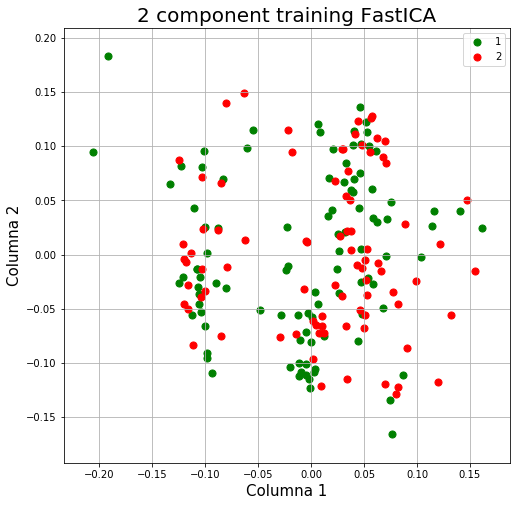

In [57]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Columna 1', fontsize = 15)
ax.set_ylabel('Columna 2', fontsize = 15)
ax.set_title('2 component training FastICA', fontsize = 20)
targets = [1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['normal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Columna 1']
               , finalDf.loc[indicesToKeep, 'Columna 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

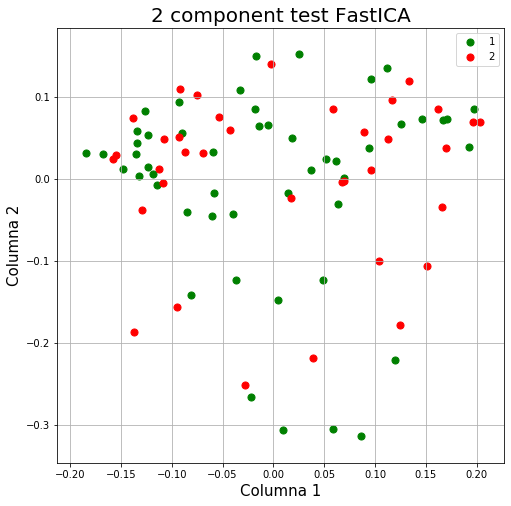

In [58]:
principalDf = pd.DataFrame(data = test
             , columns = ['Columna 1', 'Columna 2'])
finalDf = pd.concat([principalDf, df1[['normal']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Columna 1', fontsize = 15)
ax.set_ylabel('Columna 2', fontsize = 15)
ax.set_title('2 component test FastICA', fontsize = 20)
targets = [1,2]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['normal'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Columna 1']
               , finalDf.loc[indicesToKeep, 'Columna 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

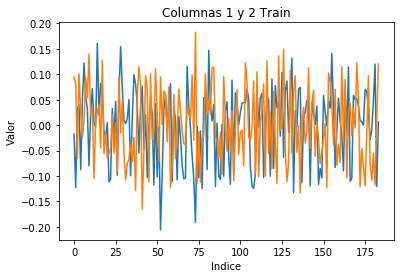

In [59]:
plt.plot(train)
plt.title('Columnas 1 y 2 Train')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

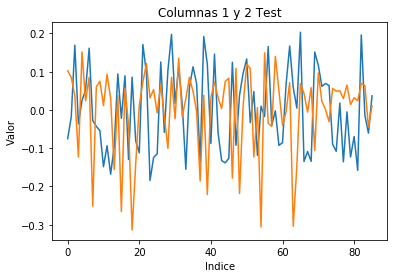

In [60]:
plt.plot(test)
plt.title('Columnas 1 y 2 Test')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

De similar forma al ejercicio anterior, los gráficos muestran que los nuevos parametros generados con ICA no muestran patrones. Pero los datos ya no están tan dispersos y se puede empezar a ver tenuemente la existencia de comunidades de soluciones. A la vez cabe notar que los gráficos Valor vs Índice muestra una tendencia a los datos ser negativos (más visible en el gráfico asociado al conjunto de prueba) por lo que empieza a tener un sentido poder clasificarlos.

**v)** ¿Qué tanto se ve afectada la calidad de predicción si se utiliza la representación reducida generada por PCA vs la representación original? ¿Es esperable este fenómeno? ¿Podría mejorar la calidad de predicción? Proponga e implemente un criterio para seleccionar el número de componentes $d$ en PCA. Comente

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
test = pca.fit_transform(Xstd_test)
train = pca.fit_transform(Xstd_train)

from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(train, class_label_train)
pred_train = model.predict(train) 
pred_test = model.predict(test)


print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.717391304347826
Score test:  0.23255813953488372


In [62]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
test = ica.fit_transform(Xstd_test)
train = ica.fit_transform(Xstd_train)

from sklearn.linear_model import Perceptron
model = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1)
model.fit(train, class_label_train)
pred_train = model.predict(train) 
pred_test = model.predict(test)


print("Score train: ",accuracy_score(class_label_train, pred_train))
print("Score test: ",accuracy_score(class_label_test, pred_test))

Score train:  0.8206521739130435
Score test:  0.7325581395348837


Utilizando el set de entrenamiento reducido con CPA, se entrenó con la modelo lineal del perceptrón.
Prediciendo sobre el set de entrenamiento se obtuvo un accuracy_score del 71,7% , pero prediciendo sobre el set de pruebas se tuvo un accuracy_score del 23,3%.
En comparanción a los accuracy_score del 80% visto en el modelo del perceptro en el aparatado s), este resultado deja mucho que desear.
En efecto, de los análisis anteriores se estimó que posiblemente se pierde información significativa al reducir la dimensión a sólo 2 para el caso de CPA.

No obstante FastICA demostró ser un mejor reductor de dimensiones al tener accuracy_scores del 80% para su regresión con ambos set de pruebas y entrenamiento.

In [63]:
maximo = 0
for i in range(2, 22): #22 columnas para el conjunto de entrenamiento Xstd_train
    pca_model = PCA(n_components=i)
    pca_model.fit(Xstd_train)
    train = pca_model.transform(Xstd_train)
    test = pca_model.transform(Xstd_test)
    model_PCA = Perceptron(fit_intercept=True, eta0=1.0, max_iter=1000, n_jobs=-1).fit(train, class_label_train)
    score = model_PCA.score(train, class_label_train)
    if (score > maximo):
        maximo = score
        d = i
print(f"La dimension óptima para PCA es d = {d} y cuyo puntaje fue score = {maximo}")

La dimension óptima para PCA es d = 15 y cuyo puntaje fue score = 0.8369565217391305


Mediante el uso de una dimensión óptima $d = 15$ para PCA obteniendo un score del 84% superando a Perceptron y FastICA. El costo de lograrlo fueron 15 iteraciones así que claramente la regresión con FastICA pareciera ser la más eficiente.

## Estimación de edad de personas

#### Librerias

In [64]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import time

### Datos

Lo primero que haremos será obtener los datos descritos en el enunciado.

In [65]:
eventrain = sio.loadmat("AgeGenderClassification/eventrain.mat")
eventest = sio.loadmat("AgeGenderClassification/eventest.mat")
trainData = eventrain['trcoll'][0][0]
testData = eventest['tecoll'][0][0]

In [66]:
print ("Instancias de entrenamiento:", trainData[1].shape[0])
print ("Instancias de testeo:", testData[1].shape[0])

Instancias de entrenamiento: 3500
Instancias de testeo: 1050


#### Comprensión de los datos

Podemos notar que vienen 11 valores dentro de los conjuntos, los cuales pueden inferirse en base a sus tamaños gracías al README proporcionado en el enunciado, o bien, analizando sus valores.

Primero notaremos los tamaños de los 11 valores, y veremos si estos son identicos o necesitan reordenamiento.

In [68]:
for i in range(11):
    print (i, trainData[i].shape, testData[i].shape)

0 (3500, 14) (1050, 14)
1 (3500, 1) (1050, 1)
2 (3500, 1) (1050, 1)
3 (3500, 37) (1050, 37)
4 (3500, 600) (1050, 600)
5 (3500, 2989) (1050, 2989)
6 (3500, 1) (1050, 1)
7 (3500, 1) (1050, 1)
8 (1, 3500) (1, 1050)
9 (3500, 7) (1050, 7)
10 (3500, 2) (1050, 2)


Son idénticos y podemos identificar algunos de los valores.

| ID | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10  |
| -  | - | - | - | - | - | - | - | - | - | - | -   |
| Value | genFeat | 1 | 2 | ffcoefs | faceGist | 5 | 6 | 7 | 8 | facePosSize | 10 |


Para identificar los otros valores revisaremos que valores pueden tomar los *onehot vectors*.

In [69]:
print ('ID 1:', np.unique(trainData[1].T))
print ('ID 2:', np.unique(trainData[2].T))
print ('ID 6:', np.unique(trainData[6].T))
print ('ID 7:', np.unique(trainData[7].T))
print ('ID 8:', np.unique(trainData[8]))

ID 1: [ 1  5 10 16 28 51 75]
ID 2: [1 2]
ID 6: [0.00990099 0.02970297 0.03960396 0.04950495 0.05940594 0.06930693
 0.07920792 0.08910891 0.0990099  0.10891089 0.11881188 0.12871287
 0.13861386 0.14851485 0.15841584 0.16831683 0.17821782 0.18811881
 0.1980198  0.20792079 0.21782178 0.22772277 0.23762376 0.24752475
 0.25742574 0.26732673 0.27722772 0.28712871 0.2970297  0.30693069
 0.31683168 0.32673267 0.33663366 0.34653465 0.35643564 0.36633663
 0.37623762 0.38613861 0.3960396  0.40594059 0.41584158 0.42574257
 0.43564356 0.44554455 0.45544554 0.46534653 0.47524752 0.48514851
 0.4950495  0.5049505  0.51485149 0.52475248 0.53465347 0.54455446
 0.55445545 0.56435644 0.57425743 0.58415842 0.59405941 0.6039604
 0.61386139 0.62376238 0.63366337 0.64356436 0.65346535 0.66336634
 0.67326733 0.68316832 0.69306931 0.7029703  0.71287129 0.72277228
 0.73267327 0.74257426 0.75247525 0.76237624 0.77227723 0.78217822
 0.79207921 0.8019802  0.81188119 0.82178218 0.83168317 0.84158416
 0.85148515 0.86

De esto logramos inferir que son los valores *ageClass*, *genClass*y *faceData* de los id 1, 2 y 8 respectivamente. Ahora viendo los valores de las variables restantes.

In [70]:
print ("6:", trainData[6].T)
print ("7:", trainData[7].T)
print ("10:", np.unique(trainData[10]))

6: [[0.74257426 0.79207921 0.2970297  ... 0.57425743 0.5049505  0.62376238]]
7: [[31.96438356 30.29863014 28.38356164 ...  2.85205479  3.73972603
   1.78082192]]
10: [   1    2    3 ... 5631 5633 5646]


Lo que no muestras nada representativo más que 6 sea una variable que describe una distribución de probabilidad. Ahora bien, al analizar, el 5, notamos inmediatamente que es una imagen debido a sus valores y dimensiones. (61x49 = 2989)

In [71]:
np.unique(trainData[5])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [72]:
img1 = trainData[5][19]
img = np.array([img1[i*61:(i+1)*61] for i in range(49)])

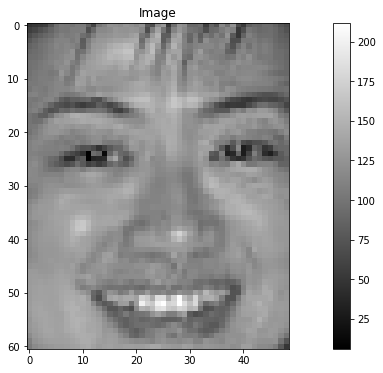

In [73]:
plt.title('Image')
plt.imshow(img.T,cmap="gray")
plt.colorbar()
plt.gcf().set_size_inches((16,6))
plt.show()

Con esto llegamos a los siguientes valores:

| ID | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10  |
| -  | - | - | - | - | - | - | - | - | - | - | -   |
| Value | genFeat | ageClass | genClass | ffcoefs | faceGist | fimg | 6 | 7 | faceData | facePosSize | 10 |

Ahora definiremos unas funciones para el manejo de estas miniaturas

In [74]:
def toVector(img):
    result = np.array([], dtype="uint8")
    for col in img.T:
        result = np.append(result, col)
    return result

def toImg(vector):
    return np.array([vector[(i)*(61):(i+1)*(61)] for i in range(49)]).T

### Identificación del problema

A modo de realizar un breve análisis sobre los atributos posibles, considerando las descripciones de los mismos, y las estructuras señaladas en el *Readme*, son pocas las variables que intuitivamente podrían ayudarnos a colaborar en una buena predicción, de todas formas realizaremos un analisis objetivo utilizando la mayor cantidad de atributos y seleccionando los que otorguen mayor información.

Consideremos que nos encontramos en un problema de **clasificación multi-clase**. Esto se debe a que nuestras instancias están separadas por categorias la cual resulta parecido a un promedio del rango etario al cual se pertenece. También podríamos querer intentar realizar una regresión sobre los datos de forma que tomemos la clase más cercana a la predicción.

A todos nuestros procedimientos los iremos comparando además con una concepción intuitiva que es tomar en cuenta la imagen **fimg** y el género **genClass** de la persona.

Consideremos que $X \in \mathbb{R}^{d\times w}$ es nuestra matriz de ejemplos con $d \in \mathbb{R}$ instancias y $w \in \mathbb{R}$ atributos.

In [75]:
def dataToSample(data, args):
    d = data[1].shape[0]
    X = np.array([np.array([], dtype="uint8") for i in range(d)])
    for i in args:
        genClass = False
        new = data[i] if (i != 8) else (data[i].T)
        X = np.array([ np.append(X[k], new[k]) for k in range(d)])
    return X

def getGT(data, pos):
    return data[pos]

Consideremos los siguientes identificadores de conjuntos, de estos valores, obviaremos el valor *faceData* debido a que no es un valor numérico y representarlo como tal no nos aporta ningún valor de información.

|  ID  |  Valor |
|------|--------|
|  0   | {fimg} |
|  1   | {fimg, genClass} |
|  2   | All - {faceData} |
|  3   | {fimg} |

El conjunto 3, es un conjunto auxiliar para realizar otros experimentos. Recordemos ademas que nuestras etiquetas están configuradas de la siguiente forma:

| Label | 1 | 5 | 10 | 16 | 28 | 51 | 75 |
|-------|---|---|----|----|----|----|----|
| Age Range | 0-2 | 3-7 | 8-12 | 13-19 | 20-36 | 37-65 | 75 o más |

In [76]:
Y_train = getGT(trainData, 1)
Y_test = getGT(testData, 1)
X_train_0 = dataToSample(trainData, [5])
X_train_3 = dataToSample(trainData, [5])
X_train_1 = dataToSample(trainData, [5, 2])
X_train_2 = dataToSample(trainData, [0, 2, 3, 4, 5, 6, 7, 9, 10])
X_test_0 = dataToSample(testData, [5])
X_test_3 = dataToSample(testData, [5])
X_test_1 = dataToSample(testData, [5, 2])
X_test_2 = dataToSample(testData, [0, 2, 3, 4, 5, 6, 7, 9, 10])

In [77]:
print ('Shapes')
print ('Y_train: ', Y_train.shape)
print ('Y_test: ', Y_test.shape)
print ('X_train_0: ', X_train_0.shape)
print ('X_train_1: ', X_train_1.shape)
print ('X_train_2: ', X_train_2.shape)
print ('X_test_0: ', X_test_0.shape)
print ('X_test_1: ', X_test_1.shape)
print ('X_test_2: ', X_test_2.shape)

Shapes
Y_train:  (3500, 1)
Y_test:  (1050, 1)
X_train_0:  (3500, 2989)
X_train_1:  (3500, 2990)
X_train_2:  (3500, 3652)
X_test_0:  (1050, 2989)
X_test_1:  (1050, 2990)
X_test_2:  (1050, 3652)


**Continuamos** con una estandarización de los datos, lo cual es importantisimo de realidad debido a los distintos valores posibles que tienen todos estos atributos. Si bien 0 no debiese tener dificultades debido a que es solo los valores de la imagen, los escalamos de todas formas para su primera utilización.

In [78]:
from sklearn import preprocessing as prp
std_0 = prp.StandardScaler()
std_1 = prp.StandardScaler()
std_2 = prp.StandardScaler()

In [79]:
std_0.fit(X_train_0)
std_1.fit(X_train_1)
std_2.fit(X_train_2)

X_std_train_0 = std_0.transform(X_train_0)
X_std_test_0 = std_0.transform(X_test_0)
X_std_train_1 = std_1.transform(X_train_1)
X_std_test_1 = std_1.transform(X_test_1)
X_std_train_2 = std_2.transform(X_train_2)
X_std_test_2 = std_2.transform(X_test_2)

Teniendo nuestros datos estandarizados, podemos continuar con  algunas funciones de utilidad, para realizar métricas y una función de discretización del resultado para la regresión lineal.

In [80]:
import sklearn.linear_model as lm
from sklearn.metrics import f1_score, r2_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [81]:
def discretize(predictions):
    for i in range(len(predictions)):
        agep = predictions[i][0]
        if (agep < 2.5):
            predictions[i][0] = 1
        elif (agep < 7.5):
            predictions[i][0] = 5
        elif (agep < 12.5):
            predictions[i][0] = 10
        elif (agep < 19.5):
            predictions[i][0] = 16
        elif (agep < 36.5):
            predictions[i][0] = 28
        elif (agep < 65.5):
            predictions[i][0] = 51
        else:
            predictions[i][0] = 75
    return predictions

### Regresion Lineal



In [82]:
a = time.time()
print ('Entrenado modelo 0')
model_rll0 = lm.LinearRegression().fit(X_std_train_0, Y_train)
b = time.time()
print ('Entrenamiento terminado - {0}[s]\nEntrenando modelo 1'.format(b-a))
model_rll1 = lm.LinearRegression().fit(X_std_train_1, Y_train)
c = time.time()
print ('Entrenamiento terminado - {0}[s]\nEntrenando modelo 2'.format(c-b))
model_rll2 = lm.LinearRegression().fit(X_std_train_2, Y_train)
d = time.time()
print ('Entrenamiento terminado - {0}[s]'.format(d-c))

Entrenado modelo 0
Entrenamiento terminado - 20.59688949584961[s]
Entrenando modelo 1
Entrenamiento terminado - 20.03338861465454[s]
Entrenando modelo 2
Entrenamiento terminado - 27.32989239692688[s]


In [83]:
pred_rll0_tr = model_rll0.predict(X_std_train_0)
pred_rll0_ts = model_rll0.predict(X_std_test_0)
pred_rll1_tr = model_rll1.predict(X_std_train_1)
pred_rll1_ts = model_rll1.predict(X_std_test_1)
pred_rll2_tr = model_rll2.predict(X_std_train_2)
pred_rll2_ts = model_rll2.predict(X_std_test_2)

In [84]:
pred_rll0_tr_d = discretize(pred_rll0_tr)
pred_rll0_ts_d = discretize(pred_rll0_ts)
pred_rll1_tr_d = discretize(pred_rll1_tr)
pred_rll1_ts_d = discretize(pred_rll1_ts)
pred_rll2_tr_d = discretize(pred_rll2_tr)
pred_rll2_ts_d = discretize(pred_rll2_ts)

In [85]:
f1_tr0 = f1_score(Y_train, pred_rll0_tr_d, average='micro')
f1_ts0 = f1_score(Y_test, pred_rll0_ts_d, average='micro')
f1_tr1 = f1_score(Y_train, pred_rll1_tr_d, average='micro')
f1_ts1 = f1_score(Y_test, pred_rll1_ts_d, average='micro')
f1_tr2 = f1_score(Y_train, pred_rll2_tr_d, average='micro')
f1_ts2 = f1_score(Y_test, pred_rll2_ts_d, average='micro')

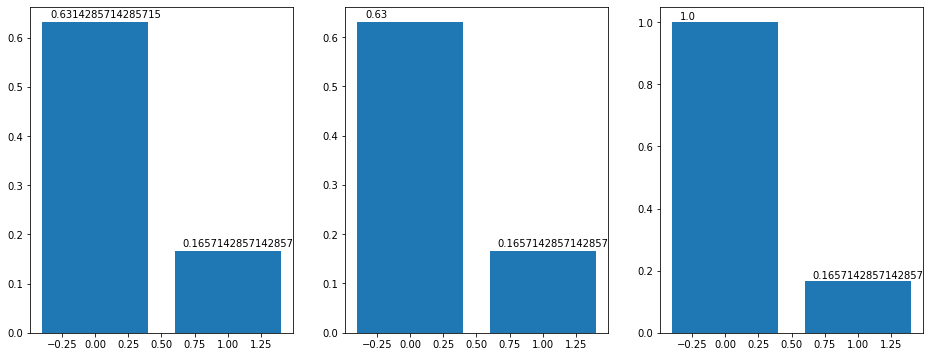

In [86]:
fig, (x, y, z) = plt.subplots(1,3)
x.bar(height = [f1_tr0, f1_ts0], x = list(range(2)))
x.text(y = f1_tr0+0.01, x = 0-.34, s = str(f1_tr0))
x.text(y = f1_ts0+0.01, x = 1-.34, s = str(f1_ts0))
y.bar(height = [f1_tr1, f1_ts1], x = list(range(2)))
y.text(y = f1_tr1+0.01, x = 0-.34, s = str(f1_tr1))
y.text(y = f1_ts1+0.01, x = 1-.34, s = str(f1_ts1))
z.bar(height = [f1_tr2, f1_ts2], x = list(range(2)))
z.text(y = f1_tr2+0.01, x = 0-.34, s = str(f1_tr2))
z.text(y = f1_ts2+0.01, x = 1-.34, s = str(f1_ts2))
plt.gcf().set_size_inches((16,6))
plt.show()

In [87]:
f1_tr0 = f1_score(Y_train, pred_rll0_tr_d, average=None)
f1_ts0 = f1_score(Y_test, pred_rll0_ts_d, average=None)
f1_tr1 = f1_score(Y_train, pred_rll1_tr_d, average=None)
f1_ts1 = f1_score(Y_test, pred_rll1_ts_d, average=None)
f1_tr2 = f1_score(Y_train, pred_rll2_tr_d, average=None)
f1_ts2 = f1_score(Y_test, pred_rll2_ts_d, average=None)

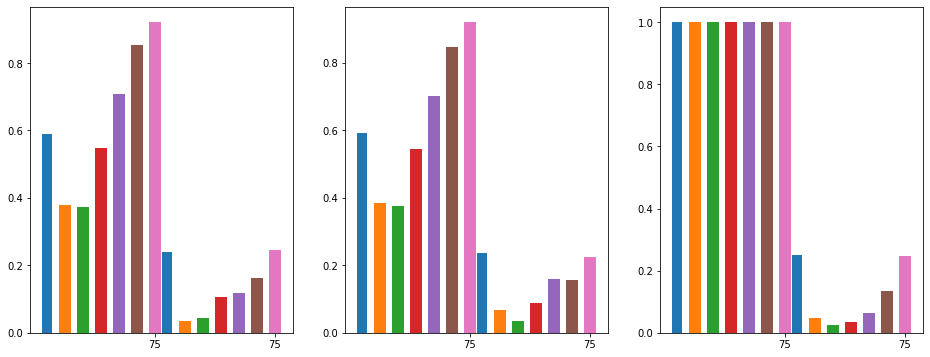

In [88]:
fig, (x, y, z) = plt.subplots(1,3)
x.bar(height = [f1_tr0[0], f1_ts0[0]], x = [0 - .45, 1-.45], width=.08, tick_label='1')
x.bar(height = [f1_tr0[1], f1_ts0[1]], x = [0 - .30, 1-.30], width=.1, tick_label='5')
x.bar(height = [f1_tr0[2], f1_ts0[2]], x = [0 - .15, 1-.15], width=.1, tick_label='10')
x.bar(height = [f1_tr0[3], f1_ts0[3]], x = [0 , 1], width=.1, tick_label='16')
x.bar(height = [f1_tr0[4], f1_ts0[4]], x = [0 + .15, 1+.15], width=.1, tick_label='28')
x.bar(height = [f1_tr0[5], f1_ts0[5]], x = [0 + .3, 1+.3], width=.1, tick_label='51')
x.bar(height = [f1_tr0[6], f1_ts0[6]], x = [0 + .45, 1+.45], width=.1, tick_label='75')

y.bar(height = [f1_tr1[0], f1_ts1[0]], x = [0 - .45, 1-.45], width=.08, tick_label='1')
y.bar(height = [f1_tr1[1], f1_ts1[1]], x = [0 - .30, 1-.30], width=.1, tick_label='5')
y.bar(height = [f1_tr1[2], f1_ts1[2]], x = [0 - .15, 1-.15], width=.1, tick_label='10')
y.bar(height = [f1_tr1[3], f1_ts1[3]], x = [0 , 1], width=.1, tick_label='16')
y.bar(height = [f1_tr1[4], f1_ts1[4]], x = [0 + .15, 1+.15], width=.1, tick_label='28')
y.bar(height = [f1_tr1[5], f1_ts1[5]], x = [0 + .3, 1+.3], width=.1, tick_label='51')
y.bar(height = [f1_tr1[6], f1_ts1[6]], x = [0 + .45, 1+.45], width=.1, tick_label='75')

z.bar(height = [f1_tr2[0], f1_ts2[0]], x = [0 - .45, 1-.45], width=.08, tick_label='1')
z.bar(height = [f1_tr2[1], f1_ts2[1]], x = [0 - .30, 1-.30], width=.1, tick_label='5')
z.bar(height = [f1_tr2[2], f1_ts2[2]], x = [0 - .15, 1-.15], width=.1, tick_label='10')
z.bar(height = [f1_tr2[3], f1_ts2[3]], x = [0 , 1], width=.1, tick_label='16')
z.bar(height = [f1_tr2[4], f1_ts2[4]], x = [0 + .15, 1+.15], width=.1, tick_label='28')
z.bar(height = [f1_tr2[5], f1_ts2[5]], x = [0 + .3, 1+.3], width=.1, tick_label='51')
z.bar(height = [f1_tr2[6], f1_ts2[6]], x = [0 + .45, 1+.45], width=.1, tick_label='75')

plt.gcf().set_size_inches((16,6))
plt.show()

En el gráfico anterior podemos ver que clases están siendo más dificiles de predecir, donde claramente notamos que la clase **75** es la más sencilla mientras que la clase **10** es lás con mayor dificultades. Aún con todo esto, notamos la gran diferencia entre datos de entrenamiento y de testing, lo que no da a pensar que estamos en riesgo de overfitting por la gran dimensionalidad de nuestros datos.

Por esto, ahora revisemos la métrica **$R^2$** que debido a ser el coeficiente de determinación nos permitirá tener un conocimiento más profundo sobre la separación de los datos.

In [90]:
r2_tr0 = r2_score(Y_train, pred_rll0_tr_d)
r2_ts0 = r2_score(Y_test, pred_rll0_ts_d)
r2_tr1 = r2_score(Y_train, pred_rll1_tr_d)
r2_ts1 = r2_score(Y_test, pred_rll1_ts_d)
r2_tr2 = r2_score(Y_train, pred_rll2_tr_d)
r2_ts2 = r2_score(Y_test, pred_rll2_ts_d)

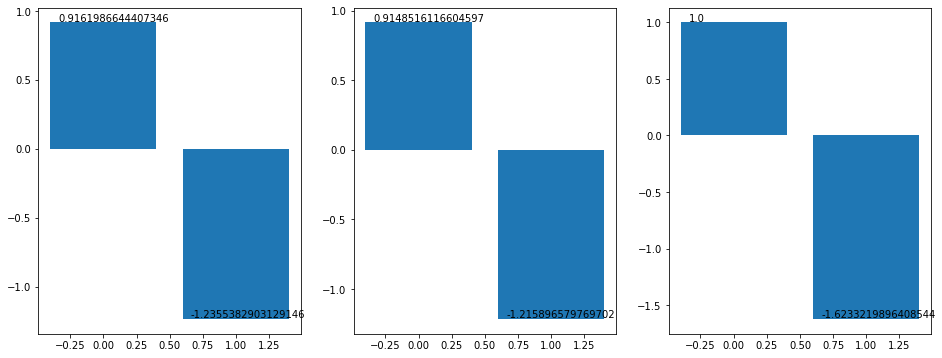

In [91]:
fig, (x, y, z) = plt.subplots(1,3)
x.bar(height = [r2_tr0, r2_ts0], x = list(range(2)))
x.text(y = r2_tr0+0.01, x = 0-.34, s = str(r2_tr0))
x.text(y = r2_ts0+0.01, x = 1-.34, s = str(r2_ts0))
y.bar(height = [r2_tr1, r2_ts1], x = list(range(2)))
y.text(y = r2_tr1+0.01, x = 0-.34, s = str(r2_tr1))
y.text(y = r2_ts1+0.01, x = 1-.34, s = str(r2_ts1))
z.bar(height = [r2_tr2, r2_ts2], x = list(range(2)))
z.text(y = r2_tr2+0.01, x = 0-.34, s = str(r2_tr2))
z.text(y = r2_ts2+0.01, x = 1-.34, s = str(r2_ts2))
plt.gcf().set_size_inches((16,6))
plt.show()

Estos resultados nos muestran un **clarisimo** *overfitting*, creado probablemente por la alta dimensionalidad, imposibilitando la capacidad de generalizar. Entonces con esto, realizaremos una selección de atributos basada en los $K$ mayores puntajes sobre una medida. Como medidas utilizaremos *MSE*, *MAE*, *MAPE*. Para entender el comportamiento de los modelos veremos la aplicación de Lasso y Ridge en base a las distintas medidas.

In [92]:
from ipywidgets import interactive, fixed

def train_model(param, Xtr, Xts, Ytr, Yts):
    model = lm.Lasso() 
    model2 = lm.Ridge()
    A = 10**(param)
    print("Param alpha =", A)
    model.set_params(alpha = A)
    model2.set_params(alpha = A)
    model.fit(Xtr, Ytr)
    model2.fit(Xtr, Ytr)
    print('LASSO')
    print("MSE train: ", mean_squared_error(Ytr, model.predict(Xtr)))
    print("MSE test: ", mean_squared_error(Yts, model.predict(Xts)))
    print("MAE train: ", mean_absolute_error(Ytr, model.predict(Xtr)))
    print("MAE test: ", mean_absolute_error(Yts, model.predict(Xts)))
    print("MAPE train: ", mean_absolute_percentage_error(Ytr, model.predict(Xtr)))
    print("MAPE test: ", mean_absolute_percentage_error(Yts, model.predict(Xts)))
    
    print('RIDGE')
    print("MSE train: ", mean_squared_error(Ytr, model2.predict(Xtr)))
    print("MSE test: ", mean_squared_error(Yts, model2.predict(Xts)))
    print("MAE train: ", mean_absolute_error(Ytr, model2.predict(Xtr)))
    print("MAE test: ", mean_absolute_error(Yts, model2.predict(Xts)))
    print("MAPE train: ", mean_absolute_percentage_error(Ytr, model2.predict(Xtr)))
    print("MAPE test: ", mean_absolute_percentage_error(Yts, model2.predict(Xts)))

In [93]:
p_min = -10
p_max = 10

Para número bajos, los valores debiesen coincidir entre grupos, más para valores alto, estos debiesen diferir debido a la información no compartida entre ellos.

**Grupo 0**

In [94]:
interactive(train_model, param=(p_min,p_max), Xtr=fixed(X_std_train_0), Xts=fixed(X_std_test_0), Ytr=fixed(Y_train), Yts=fixed(Y_test))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

**Grupo 1**

In [95]:
interactive(train_model, param=(p_min,p_max), Xtr=fixed(X_std_train_1), Xts=fixed(X_std_test_1), Ytr=fixed(Y_train), Yts=fixed(Y_test))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

**Grupo 2**

In [96]:
interactive(train_model, param=(p_min,p_max), Xtr=fixed(X_std_train_2), Xts=fixed(X_std_test_2), Ytr=fixed(Y_train), Yts=fixed(Y_test))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

De aquí en adelante, como nos especificaron la utilización de *MAPE* como medida de error, será esa la única que analizaremos a menos que se especifique lo contrario.

**Selección de atributos**

In [97]:
def fssrll(x, y, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    remaining = list(range(0, p))
    selected = []
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression()
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            predictions_train = discretize(predictions_train)
            error_candidate = mean_absolute_percentage_error(y, predictions_train)
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("Atributos = %d\n MAPE = %f"%(len(indexes),best_new_score))
    return selected

<img src="fssrll.png">

A modo de *insight* dejamos explicitado, que debimos haber utilizado un método embedido para evitar el re-entrenamiento consecutivo. Por otra parte, podemos notar como a partir de los 25 atributos empiezan a tomar notoriamente una convergencia de valores considerando que hasta los 40 atributos, aproximadamente, se termina el decrecimiento y comienza a formarse una cota de convergencia del valor **MAPE**. *Notar que hemos detenido el proceso, mas no fue un error.*

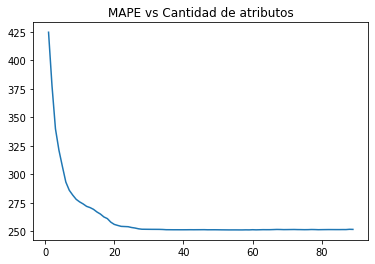

In [98]:
IDX = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89]
VALUES = [424.650569,377.696314,339.898536,321.219410,306.971490,293.203678,285.991488,281.735827,278.024103,275.787675,274.028041,271.892671,270.822894,269.269509,266.953042,265.134648,262.608806,261.150874,258.030402,256.071352,255.161776,254.339878,254.186830,254.044993,253.345995,252.881504,252.212469,251.822896,251.788499,251.756284,251.727713,251.714828,251.697017,251.603380,251.410495,251.389067,251.365597,251.365597,251.356835,251.356835,251.365597,251.401952,251.375121,251.393952,251.409835,251.436019,251.346019,251.357203,251.365188,251.336056,251.294110,251.274333,251.238707,251.238707,251.247250,251.225822,251.223781,251.286638,251.250181,251.396346,251.294890,251.360562,251.441652,251.420224,251.429408,251.519700,251.631060,251.580834,251.486711,251.515283,251.556354,251.590804,251.514691,251.485698,251.429794,251.464079,251.579287,251.528476,251.411342,251.466185,251.498555,251.530176,251.516952,251.502210,251.496588,251.530874,251.521946,251.763213,251.676398]

plt.title('MAPE vs Cantidad de atributos')
plt.plot(IDX, VALUES)
plt.show()

In [100]:
X_train_40_0 = fssrll(X_std_train_0, Y_train, k=40)

Atributos = 1
 MAPE = 424.650569
Atributos = 2
 MAPE = 377.696314
Atributos = 3
 MAPE = 339.898536
Atributos = 4
 MAPE = 321.219410
Atributos = 5
 MAPE = 306.971490
Atributos = 6
 MAPE = 293.203678
Atributos = 7
 MAPE = 285.991488
Atributos = 8
 MAPE = 281.735827
Atributos = 9
 MAPE = 278.024103
Atributos = 10
 MAPE = 275.787675
Atributos = 11
 MAPE = 274.028041
Atributos = 12
 MAPE = 271.892671
Atributos = 13
 MAPE = 270.822894
Atributos = 14
 MAPE = 269.269509
Atributos = 15
 MAPE = 266.953042
Atributos = 16
 MAPE = 265.134648
Atributos = 17
 MAPE = 262.608806
Atributos = 18
 MAPE = 261.150874
Atributos = 19
 MAPE = 258.030402
Atributos = 20
 MAPE = 256.071352
Atributos = 21
 MAPE = 255.161776
Atributos = 22
 MAPE = 254.339878
Atributos = 23
 MAPE = 254.186830
Atributos = 24
 MAPE = 254.044993
Atributos = 25
 MAPE = 253.345995
Atributos = 26
 MAPE = 252.881504
Atributos = 27
 MAPE = 252.212469
Atributos = 28
 MAPE = 251.822896
Atributos = 29
 MAPE = 251.788499
Atributos = 30
 MAPE = 

In [101]:
X_test_40_0 = X_std_test_0[:,X_train_40_0]
X_train_40_0 = X_std_train_0[:,X_train_40_0]
model_rll0 = lm.LinearRegression()
predictions_test = model_rll0.fit(X_train_40_0, Y_train).predict(X_test_40_0)
predictions_test = discretize(predictions_test)
error_candidate = mean_absolute_percentage_error(Y_test, predictions_test)

In [102]:
print (error_candidate)

299.36384687208215


In [103]:
accuracy_score(Y_test, predictions_test)

0.19142857142857142

Bastante malo realmente. Quizás no es la forma de acercarnos a este problema. O bien la representación no está siendo de utilidad.

### Regresión Logística

En base a todo lo que ya hemos realizado, y para hacer honor al tiempo, la regresión logística la realizaremos **LogisticRegression**, con *penalty=l2*, utilizaremos además un gradiente estocástico para resolver estos problemas.

In [104]:
Y_train_prima = Y_train.T[0].T

In [105]:
model_rlg0 = lm.LogisticRegression(solver='saga', multi_class='multinomial', C=1, max_iter=1000).fit(X_std_train_0, Y_train_prima)

In [106]:
model_rlg1 = lm.LogisticRegression(solver='saga', multi_class='multinomial', C=0.003, max_iter=100).fit(X_std_train_1, Y_train_prima)

In [107]:
model_rlg2 = lm.LogisticRegression(solver='saga', multi_class='multinomial', C=0.003, max_iter=100).fit(X_std_train_2, Y_train_prima)

In [108]:
print ('Modelo 0 - Train:', model_rlg0.score(X_std_train_0, Y_train))
print ('Modelo 1 - Train:', model_rlg1.score(X_std_train_1, Y_train))
print ('Modelo 2 - Train:', model_rlg2.score(X_std_train_2, Y_train))
print ('Modelo 0 - Test:', model_rlg0.score(X_std_test_0, Y_test))
print ('Modelo 1 - Test:', model_rlg1.score(X_std_test_1, Y_test))
print ('Modelo 2 - Test:', model_rlg2.score(X_std_test_2, Y_test))

Modelo 0 - Train: 0.9362857142857143
Modelo 1 - Train: 0.648
Modelo 2 - Train: 0.7414285714285714
Modelo 0 - Test: 0.3476190476190476
Modelo 1 - Test: 0.38857142857142857
Modelo 2 - Test: 0.439047619047619


Utilizaremos la técnica de reducción de dimensionalidad **PCA** para representar los datos en menor cantidad de dimensiones.

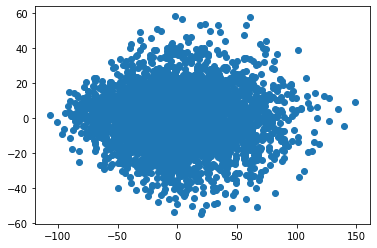

In [109]:
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(X_std_train_2)
X_pca_train = pca_model.transform(X_std_train_2)
X_pca_test = pca_model.transform(X_std_test_2)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()

Podemos notar como los datos no pareciesen estar separados por ningún tipo de conjunto, más bien pareciera que todos estuviesen en el mismo lugar, eso quiere decir que la información que estamos entregando o bien, no es lo suficientemente representativa o bien los atributos que entregamos no están generando un entendimiento sobre los datos para resolver el problema. Bajar a esta cantidad de dimensiones no nos permitirá conocer un resultado correcto.

In [110]:
maximo = 0
for i in range(2, 101):
    pca_model = PCA(n_components=i)
    pca_model.fit(X_std_train_2)
    X_pca_train = pca_model.transform(X_std_train_2)
    X_pca_test = pca_model.transform(X_std_test_2)
    model_PCA = lm.LogisticRegression(solver='saga', multi_class='multinomial', C=0.003, max_iter=500).fit(X_pca_train, Y_train_prima)
    score = model_PCA.score(X_pca_train, Y_train_prima)
    if (score > maximo):
        maximo = score
        d = i
        model_PCA_max = model_PCA

In [111]:
pca_model = PCA(n_components=d)
pca_model.fit(X_std_train_2)
X_pca_train = pca_model.transform(X_std_train_2)
X_pca_test = pca_model.transform(X_std_test_2)
score = np.mean([model_PCA_max.score(X_pca_test, Y_test.T[0].T) for i in range(10)])
print ('Modelo con {0} atributos - Score: {1}'.format(d,score))

Modelo con 98 atributos - Score: 0.40476190476190477


Si consideramos que usamos el grupo 2, el cual tienen todos los datos, reducir su dimensionalidad a 98 atributos no se aleja mucho de la realizad obtenida en la regresión lineal.

### Perceptron


In [112]:
classifier0 = lm.Perceptron(tol=1e-3)
classifier1 = lm.Perceptron(tol=1e-3)
classifier2 = lm.Perceptron(tol=1e-3)
classifierPCA = lm.Perceptron(tol=1e-3)

In [113]:
classifier0=classifier0.fit(X_std_train_0, Y_train_prima)
classifier1=classifier1.fit(X_std_train_1, Y_train_prima)
classifier2=classifier2.fit(X_std_train_2, Y_train_prima)
classifierPCA=classifierPCA.fit(X_pca_train, Y_train_prima)

In [114]:
ppred0 = classifier0.predict(X_std_test_0)
ppred1 = classifier1.predict(X_std_test_1)
ppred2 = classifier2.predict(X_std_test_2)
ppredPCA = classifierPCA.predict(X_pca_test)

In [115]:
PMAPE0 = mean_absolute_percentage_error(ppred0, Y_test)
PACC0 = accuracy_score(ppred0, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(PACC0, PMAPE0))

Accuracy: 0.32666666666666666
MAPE: 3641.904039901675


In [116]:
PMAPE1 = mean_absolute_percentage_error(ppred1, Y_test)
PACC1 = accuracy_score(ppred0, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(PACC1, PMAPE1))

Accuracy: 0.32666666666666666
MAPE: 3863.712483660131


In [117]:
PMAPE2 = mean_absolute_percentage_error(ppred2, Y_test)
PACC2 = accuracy_score(ppred2, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(PACC2, PMAPE2))

Accuracy: 0.38666666666666666
MAPE: 4950.313194039522


In [118]:
PMAPEPCA = mean_absolute_percentage_error(ppredPCA, Y_test)
PACCPCA = accuracy_score(ppredPCA, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(PACCPCA, PMAPEPCA))

Accuracy: 0.3295238095238095
MAPE: 4713.064308580573


### MultiLayer Perceptron

In [119]:
from sklearn import neural_network as nn

In [120]:
mlpc0 = nn.MLPClassifier(alpha=0.003, learning_rate_init=0.003)
mlpc0.fit(X_std_train_0, Y_train_prima)

MLPClassifier(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [121]:
mlpc1 = nn.MLPClassifier(alpha=0.003, learning_rate_init=0.003)
mlpc1.fit(X_std_train_1, Y_train_prima)

MLPClassifier(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [122]:
mlpc2 = nn.MLPClassifier(alpha=0.003, learning_rate_init=0.003)
mlpc2.fit(X_std_train_2, Y_train_prima)

MLPClassifier(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [123]:
mlpcpca = nn.MLPClassifier(alpha=0.003, learning_rate_init=0.003)
mlpcpca.fit(X_pca_train, Y_train_prima)

MLPClassifier(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.003, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [124]:
MLPpred0 = mlpc0.predict(X_std_test_0)
mlpmape0 = mean_absolute_percentage_error(MLPpred0, Y_test)
mlpacc0 = accuracy_score(MLPpred0, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(mlpacc0, mlpmape0))

Accuracy: 0.379047619047619
MAPE: 4112.843209474265


In [125]:
MLPpred1 = mlpc1.predict(X_std_test_1)
mlpmape1 = mean_absolute_percentage_error(MLPpred1, Y_test)
mlpacc1 = accuracy_score(MLPpred1, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(mlpacc1, mlpmape1))

Accuracy: 0.3761904761904762
MAPE: 4302.752666209338


In [126]:
MLPpred2 = mlpc2.predict(X_std_test_2)
mlpmape2 = mean_absolute_percentage_error(MLPpred2, Y_test)
mlpacc2 = accuracy_score(MLPpred2, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(mlpacc2, mlpmape2))

Accuracy: 0.4228571428571429
MAPE: 4414.8948882410095


In [127]:
MLPpredpca = mlpcpca.predict(X_pca_test)
mlpmapepca = mean_absolute_percentage_error(MLPpredpca, Y_test)
mlpaccpca = accuracy_score(MLPpredpca, Y_test)
print ('Accuracy: {0}\nMAPE: {1}'.format(mlpaccpca, mlpmapepca))

Accuracy: 0.3619047619047619
MAPE: 3913.989112025764


### Kaggle


In [176]:
y_pred = model_rll0.predict(X_test_40_0)
y_pred = mlpc1.predict(X_std_test_1)
y_pred = discretize(predictions_test)
print (y_pred)
y_pred = np.array([np.array([y_pred[i]]) if len(y_pred.shape) == 1 else np.array(y_pred[i]) for i in range(y_pred.shape[0])])

ids = np.arange(1, 1+y_pred.shape[0]).reshape(-1,1)
sub_est = np.concatenate([ids, np.array(y_pred.T).T], axis=-1)
import pandas as pd
df_aux = pd.DataFrame(sub_est, columns=["id","age"])
df_aux.to_csv("test_estimation.csv", index=False)

[[16.]
 [16.]
 [28.]
 ...
 [28.]
 [28.]
 [ 5.]]
